In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt

from genomics.popgen.admix import cluster, plot

%matplotlib inline

In [2]:
k_range = range(2, 10)  # 2..9

### The next cell is very slow. Example outputs are provided (so you can avoid running it)

In [3]:
#for k in k_range:
#    os.system('admixture --cv=10 hapmap10_auto_noofs_ld.bed %d > admix.%d' % (k, k))

## Individual order

In [4]:
f = open('hapmap10_auto_noofs_ld.fam')
ind_order = []
for l in f:
    toks = l.rstrip().replace(' ', '\t').split('\t')
    fam_id = toks[0]
    ind_id = toks[1]
    ind_order.append((fam_id, ind_id))
f.close()

## CV-plot

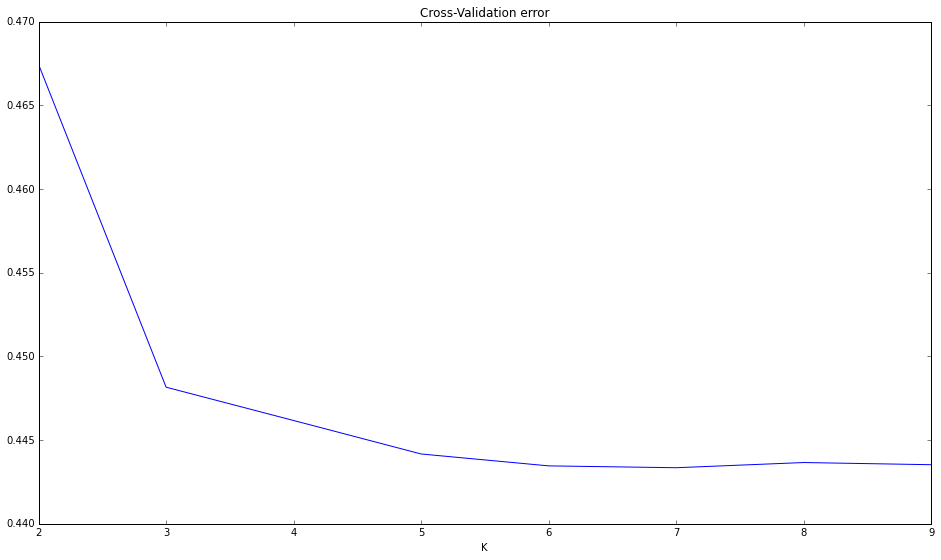

In [13]:
CVs = []
for k in k_range:
    f = open('admix.%d' % k)
    for l in f:
        if l.find('CV error') > -1:
            CVs.append(float(l.rstrip().split(' ')[-1]))
            break
    f.close()
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
ax.plot(k_range, CVs)
ax.set_title('Cross-Validation error')
ax.set_xlabel('K')

## Load meta-data

In [6]:
f = open('relationships_w_pops_121708.txt')
pop_ind = defaultdict(list)
f.readline()  # header
for l in f:
    toks = l.rstrip().split('\t')
    fam_id = toks[0]
    ind_id = toks[1]
    if (fam_id, ind_id) not in ind_order:
        continue
    mom = toks[2]
    dad = toks[3]
    if mom != '0' or dad != '0':
        continue
    pop = toks[-1]
    pop_ind[pop].append((fam_id, ind_id))
#ind_pop[('2469', 'NA20281')] = ind_pop[('2805', 'NA20281')]
f.close()

In [7]:
def load_Q(fname, ind_order):
    ind_comps = {}
    f = open(fname)
    for i, l in enumerate(f):
        comps = [float(x) for x in l.rstrip().split(' ')]
        ind_comps[ind_order[i]] = comps
    f.close()
    return ind_comps

In [8]:
comps = {}
for k in k_range:
    comps[k] = load_Q('hapmap10_auto_noofs_ld.%d.Q' % k, ind_order)

In [9]:
ordering = {}
for k in k_range:
    ordering[k] = cluster(comps[k], pop_ind)

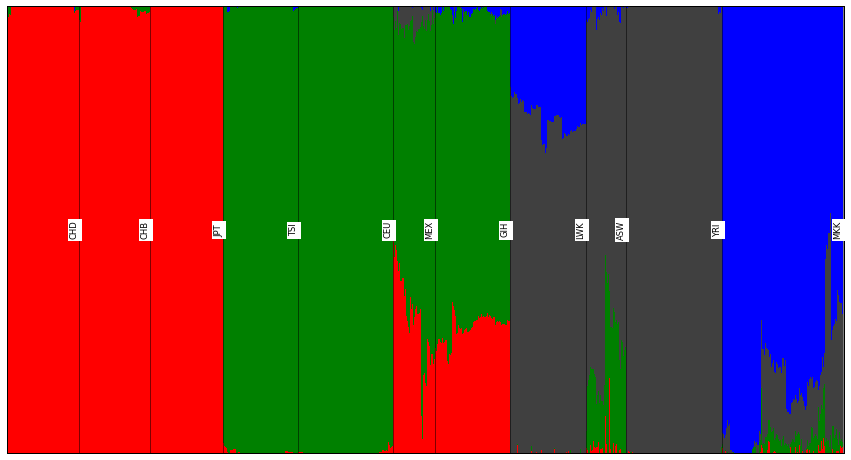

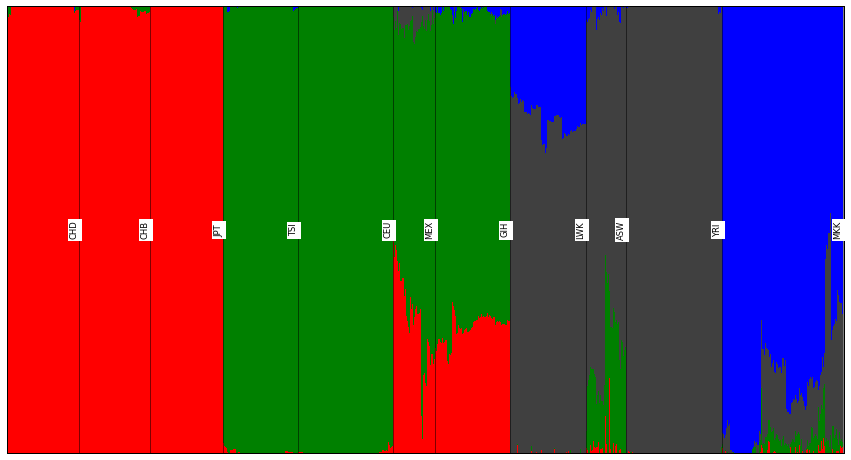

In [10]:
plot.single(comps[4], ordering[4])

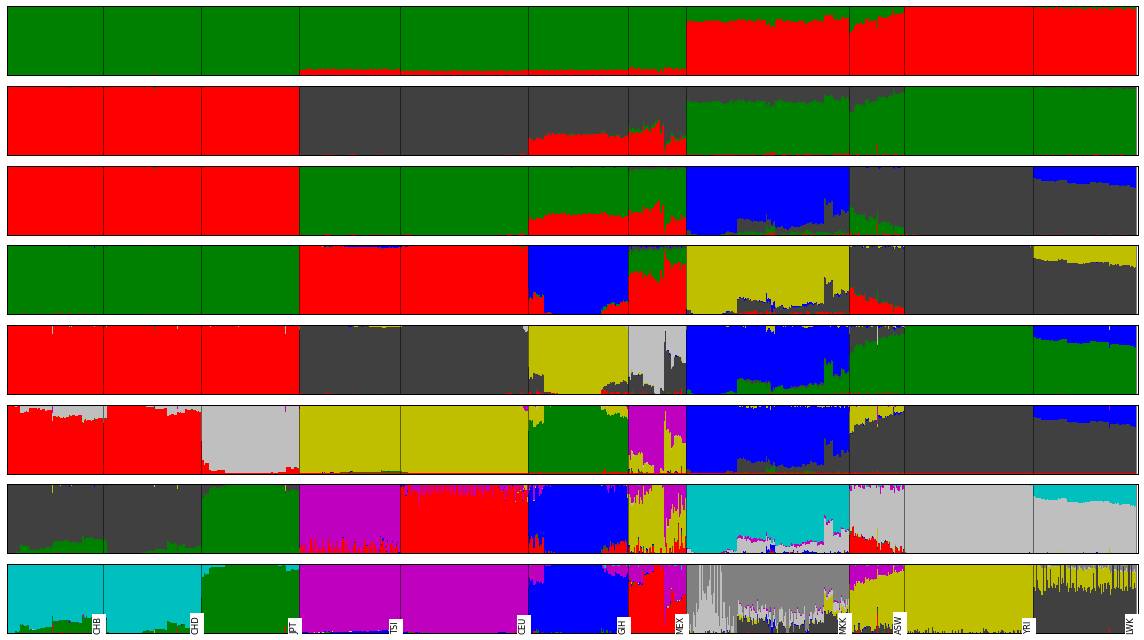

In [11]:
fig = plt.figure(figsize=(16, 9))
plot.stacked(comps, ordering[7], fig)

## Q files?

## Log-likelihood